In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

import visuals as vs
%matplotlib inline

data = pd.read_csv("census.csv")

display(data.head(n=1))



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


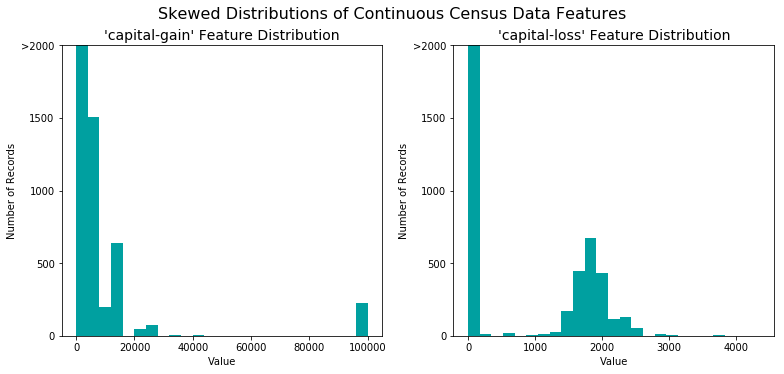

In [2]:
income_raw = data['income']
features_raw = data.drop('income', axis=1)

vs.distribution(data)


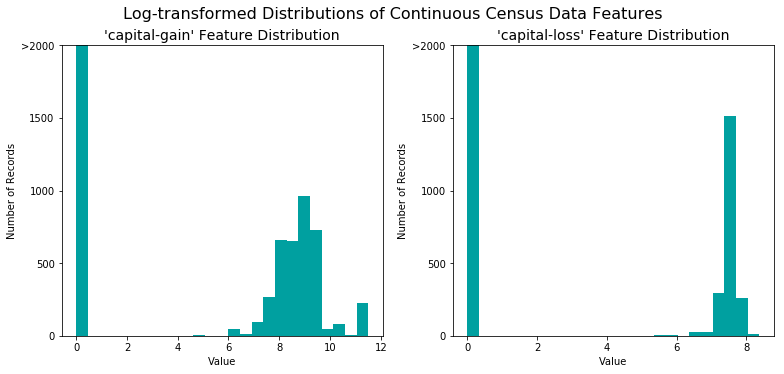

In [3]:
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

vs.distribution(features_log_transformed, transformed = True)

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [5]:
pd.get_dummies(features_log_minmax_transform.head(n = 5))

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Private,workclass_ Self-emp-not-inc,workclass_ State-gov,education_level_ 11th,education_level_ Bachelors,...,occupation_ Prof-specialty,relationship_ Husband,relationship_ Not-in-family,relationship_ Wife,race_ Black,race_ White,sex_ Female,sex_ Male,native-country_ Cuba,native-country_ United-States
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,1
1,0.452055,0.800000,0.000000,0.0,0.122449,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,1
2,0.287671,0.533333,0.000000,0.0,0.397959,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
3,0.493151,0.400000,0.000000,0.0,0.397959,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
4,0.150685,0.800000,0.000000,0.0,0.397959,1,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0


In [6]:
features_final = pd.get_dummies(features_log_minmax_transform)
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final,
                                                   income,
                                                   test_size = 0.2,
                                                   random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


c:\program1\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
accuracy = len(income[income == 1])/len(income)
precision = len(income[income == 1])/len(income)
recall = len(income[income == 1])/(len(income[income == 1]) + 0)
beta = 1
fbeta = (1 + pow(beta,2))*precision*recall/(pow(beta,2)*precision + recall)
print("Accuracy: {:.4f}, F-beta: {:.4f}".format(accuracy, fbeta))

Accuracy: 0.2478, F-beta: 0.3972


In [8]:

"""
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data.
Ans: Random Forest
     Decision Trees
     Support Vector Machines

Describe one real-world application in industry where the model can be applied 
Ans: Random Forest----making product recommendations to users
     Decision Trees----Automated Identification
     Support Vector Machines----prediction of common diseases

What are the strengths of the model; when does it perform well?
Ans: Random Forest----it is very difficult for the model to overfit
     Decision Trees----they are easy to use
     Support Vector Machines----complicated domains where there's a clear margin of separation

What are the weaknesses of the model; when does it perform poorly?
Ans: Random Forest----need for more storage for the classifiers
     Decision Trees----it is highly prone to overfitting
     Support Vector Machines----it don't work well in large datasets
     
What makes this model a good candidate for the problem, given what you know about the data
Ans: Random Forest----can make a binary classification
     Decision Trees----are adept at binary classification
     Support Vector Machines----
"""


"\nList three of the supervised learning models above that are appropriate for this problem that you will test on the census data.\nAns: Random Forest\n     Decision Trees\n     Support Vector Machines\n\nDescribe one real-world application in industry where the model can be applied \nAns: Random Forest----making product recommendations to users\n     Decision Trees----Automated Identification\n     Support Vector Machines----prediction of common diseases\n\nWhat are the strengths of the model; when does it perform well?\nAns: Random Forest----it is very difficult for the model to overfit\n     Decision Trees----they are easy to use\n     Support Vector Machines----complicated domains where there's a clear margin of separation\n\nWhat are the weaknesses of the model; when does it perform poorly?\nAns: Random Forest----need for more storage for the classifiers\n     Decision Trees----it is highly prone to overfitting\n     Support Vector Machines----it don't work well in large datasets\

In [9]:
dtrain = pd.read_csv("train.txt", sep = '\t', header = None)
dx = dtrain.drop(21,axis = 1)
dy = dtrain[21]

X_train, X_test, y_train, y_test = train_test_split(dx,
                                                   dy,
                                                   test_size = 0.2,
                                                   random_state = 1)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 239 samples.
Testing set has 60 samples.


In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')

clf.fit(X_train, y_train)
y_pred =  clf.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
print('Accuracy on train data: ', accuracy_score(y_train, clf.predict(X_train)))
print('Fbeta on train data: ', fbeta_score(y_train, clf.predict(X_train), beta = 1))
print('Accuracy on test data: ', accuracy_score(y_test, clf.predict(X_test)))
print('Fbeta on train data: ', fbeta_score(y_test, clf.predict(X_test), beta = 1))

Accuracy on train data:  1.0
Fbeta on train data:  1.0
Accuracy on test data:  0.6666666666666666
Fbeta on train data:  0.7058823529411764


In [11]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=10)
clf.fit(X_train, y_train)
actrain = accuracy_score(y_train, clf.predict(X_train))
fbtrain = fbeta_score(y_train, clf.predict(X_train), beta = 1)
actest = accuracy_score(y_test, clf.predict(X_test))
fbtest = fbeta_score(y_test, clf.predict(X_test), beta = 1)

print('Accuracy on train data: ', actrain)
print('Fbeta on train data: ', fbtrain)
print('Accuracy on test data: ', actest)
print('Fbeta on train data: ', fbtest)




Accuracy on train data:  0.891213389121339
Fbeta on train data:  0.907142857142857
Accuracy on test data:  0.6833333333333333
Fbeta on train data:  0.7246376811594203


In [12]:
dtest = pd.read_csv("test.txt", sep = '\t', header = None)
display(dtest[21])
dtest = dtest.drop(21,axis = 1)

clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)
clf.predict(dtest)

0    1
1    1
2    0
Name: 21, dtype: int64

array([1., 0., 1.])

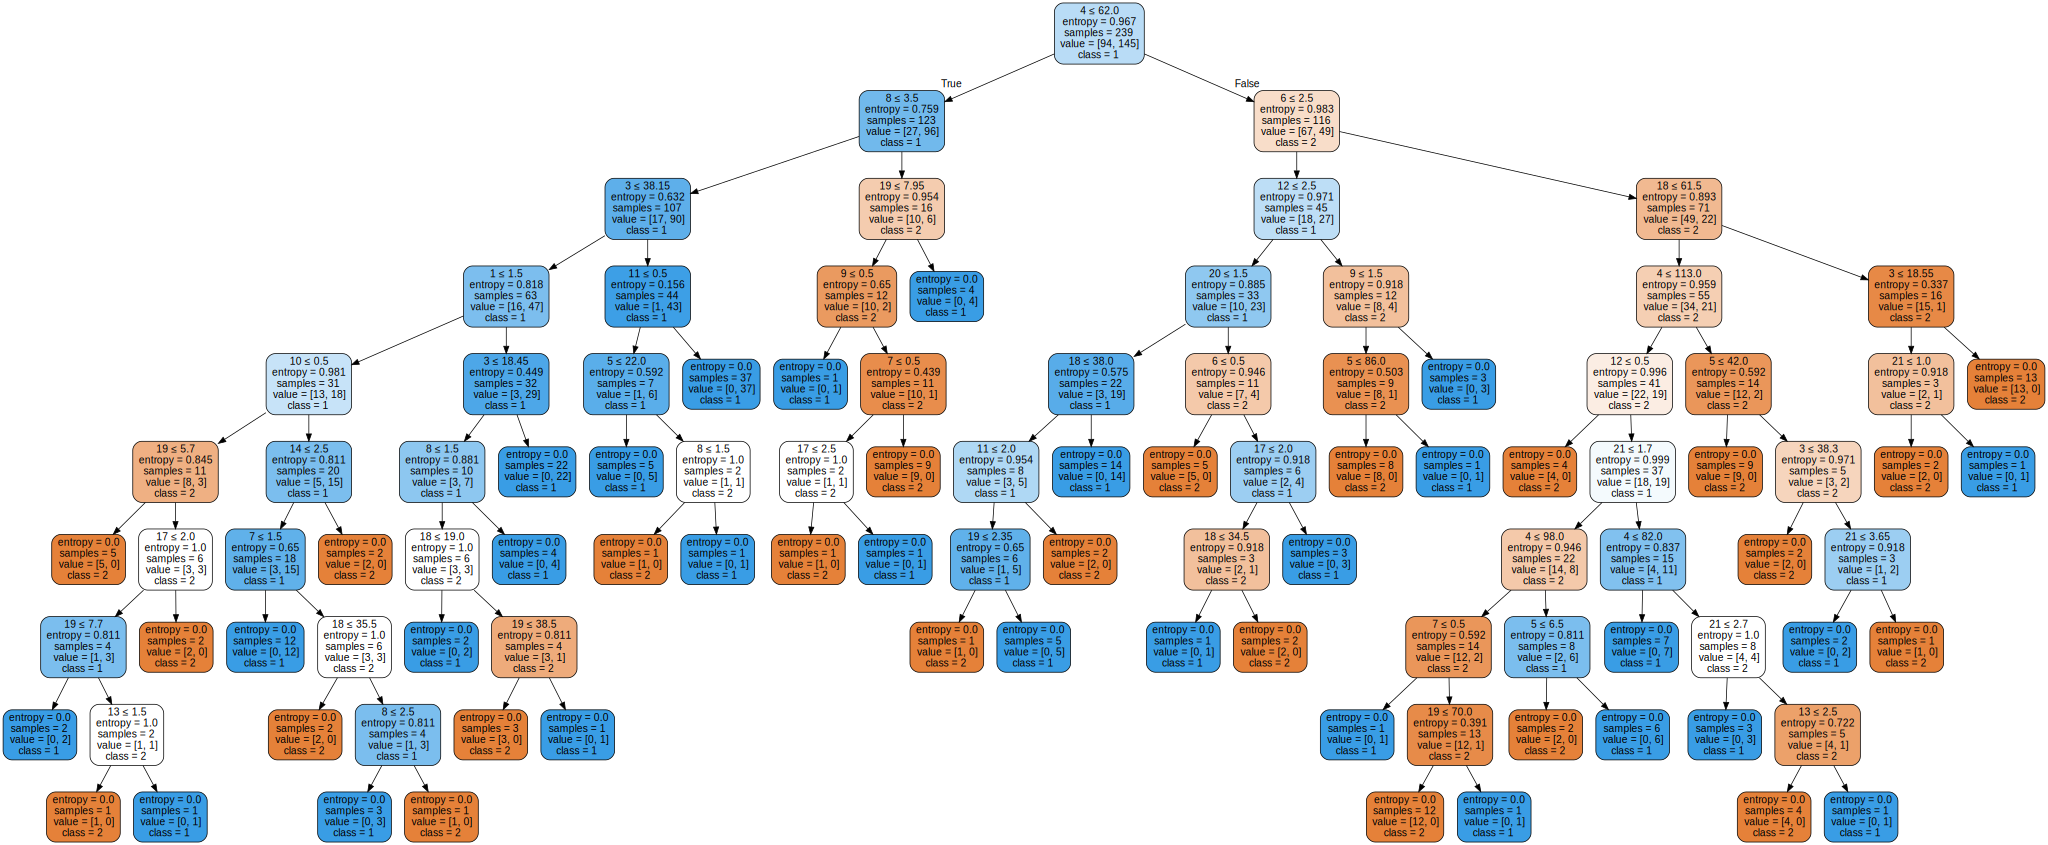

In [13]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

data_feature_name = dtrain.columns[1:]

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=data_feature_name,  
                         class_names='21',  
                         filled=True, rounded=True,  
                         special_characters=True)
graphviz.Source(dot_data)  


In [26]:
from astropy.table import Table
a = ['Accuracy-train', 'F-score-train','Accuracy-test', 'F-score-test']
b = [actrain, fbtrain, actest, fbtest]
Table([a, b], names=('Metric', 'DecisionTree',))

Metric,DecisionTree
str14,float64
Accuracy-train,0.891213389121339
F-score-train,0.907142857142857
Accuracy-test,0.6666666666666666
F-score-test,0.7142857142857142
